<a href="https://colab.research.google.com/github/UrielAnd/Inteligancia_Artificial/blob/main/breast-cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS


In [17]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

Importando data base

In [18]:
nomes=['age',	'menopause',	'tumor-size',	'inv-nodes',	'node-caps',	'deg-malig'	,'breast',	'breast-quad',	'irradiat',	'Class']
dataset=pd.read_csv('/content/sample_data/breast-cancer.csv', delimiter = "," ,encoding = "ISO-8859-1", names=nomes, header=0)
dataset
#BASE DE DADOS / DATA BASE

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [19]:
label_encoder = LabelEncoder() #binariza atributos de ordem

inpes = dataset.drop('Class',axis='columns')
sas = dataset['Class']
target = sas.values

removeRepetidos = lambda array:[x.replace("OneHot__","") for x in array]

Transformando os dados

In [20]:
inpes['age'] = label_encoder.fit_transform(inpes['age'])
inpes['menopause'] = label_encoder.fit_transform(inpes['menopause'])
inpes['tumor-size'] = label_encoder.fit_transform(inpes['tumor-size'])
inpes['inv-nodes'] = label_encoder.fit_transform(inpes['inv-nodes'])
inpes['node-caps'] = label_encoder.fit_transform(inpes['node-caps'])
inpes['deg-malig'] = label_encoder.fit_transform(inpes['deg-malig'])
inpes['irradiat'] = label_encoder.fit_transform(inpes['irradiat'])
inpes['age'] = label_encoder.fit_transform(inpes['age'])

Transformando os dados inversos

In [21]:
onehotencoder_rest = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), ['breast', 'breast-quad'])], remainder='passthrough')
inpes = onehotencoder_rest.fit_transform(inpes)
names = onehotencoder_rest.get_feature_names()
nomes_atributos = removeRepetidos(names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Naive Bayes

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


inpes = inpes[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes

# procura e identifica os rótulos das classes
label = []
for line in range(inpes.shape[0]):
  if(label.count(inpes[line, inpes.shape[1]-1])==0):
    label.append(inpes[line, inpes.shape[1]-1])

y = np.array(inpes[:, inpes.shape[1]-1])
x = (inpes[:, :(inpes.shape[1]-1)]).astype(np.float32)

# Gera os conjuntos
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos do conjunto de teste

print('Conjuntos separados!')

Conjuntos separados!


In [23]:
# rearanja o modelo para classes gaussiana
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(train_x, train_y)
print('Modelo foi acertado!')

Modelo foi acertado!


              precision    recall  f1-score   support

         0.0       0.94      0.09      0.17       158
         1.0       0.28      0.98      0.43        56

    accuracy                           0.33       214
   macro avg       0.61      0.54      0.30       214
weighted avg       0.76      0.33      0.24       214

Acurácia:  0.32710280373831774


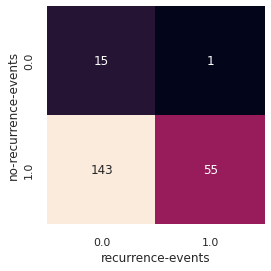

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

train_est_y = model.predict(train_x)

cal = confusion_matrix(train_y, train_est_y)
sns.heatmap(cal.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('recurrence-events')
plt.ylabel('no-recurrence-events');

print(classification_report(train_y, train_est_y)) # apresenta um relatório
print('Acurácia: ',accuracy_score(train_est_y, train_y)) # printa a acurácia

# Árvore de Decisão

In [25]:
#feature_cols = ['age',	'menopause',	'tumor-size',	'inv-nodes',	'node-caps',	'deg-malig'	,'breast',	'breast-quad',	'irradiat']
x = inpes                               #contains the attribute 
y = sas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)     # create a classifier object
classifier.fit(x_train, y_train)
DecisionTreeClassifier(criterion='entropy', random_state=0)
y_pred= classifier.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.6379310344827587

In [26]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.74      0.76        46
   recurrence-events       0.20      0.25      0.22        12

            accuracy                           0.64        58
           macro avg       0.50      0.49      0.49        58
        weighted avg       0.67      0.64      0.65        58



In [27]:
x_treino,x_teste,y_treino,y_teste = train_test_split(inpes, target, test_size = 0.20, random_state = 0)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(x_treino, y_treino) #treina o modelo

previsao = model.predict(x_teste)

dot_data = tree.export_graphviz(model, out_file=None, feature_names = nomes_atributos,
class_names = model.classes_, rounded = True, filled = True) #exportando para DOT

graph = pydotplus.graph_from_dot_data(dot_data) #provides a Python Interface to Graphviz's Dot language.
Image(graph.create_png()) #criando a imagem

ValueError: ignored

In [28]:
X= inpes
y= sas
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=123)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,
                             max_depth=5,
                             random_state=123,
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=123)

In [30]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia Treino: 0.86

 ---------------------------

Acurácia Teste: 0.67


              precision    recall  f1-score   support

         0.0       0.94      0.09      0.17       158
         1.0       0.28      0.98      0.43        56

    accuracy                           0.33       214
   macro avg       0.61      0.54      0.30       214
weighted avg       0.76      0.33      0.24       214



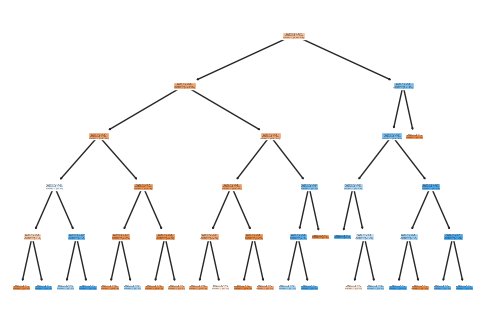

In [31]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(classification_report(train_y, train_est_y)) # mostra relatório

plt.figure()
plot_tree(clf.estimators_[499], filled=True)
plt.show()